In [3]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 317
Percentage of inconsistencies in age and married features: 3.33%
Number of inconsistencies in age and workType features: 317
Percentage of inconsistencies in age and workType features: 3.33%
Number of abnormal values: 317
Percentage of abnormal values: 3.33%

TOTAL INCONSISTENCY PERCENTAGE
9.99789739276703

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recal

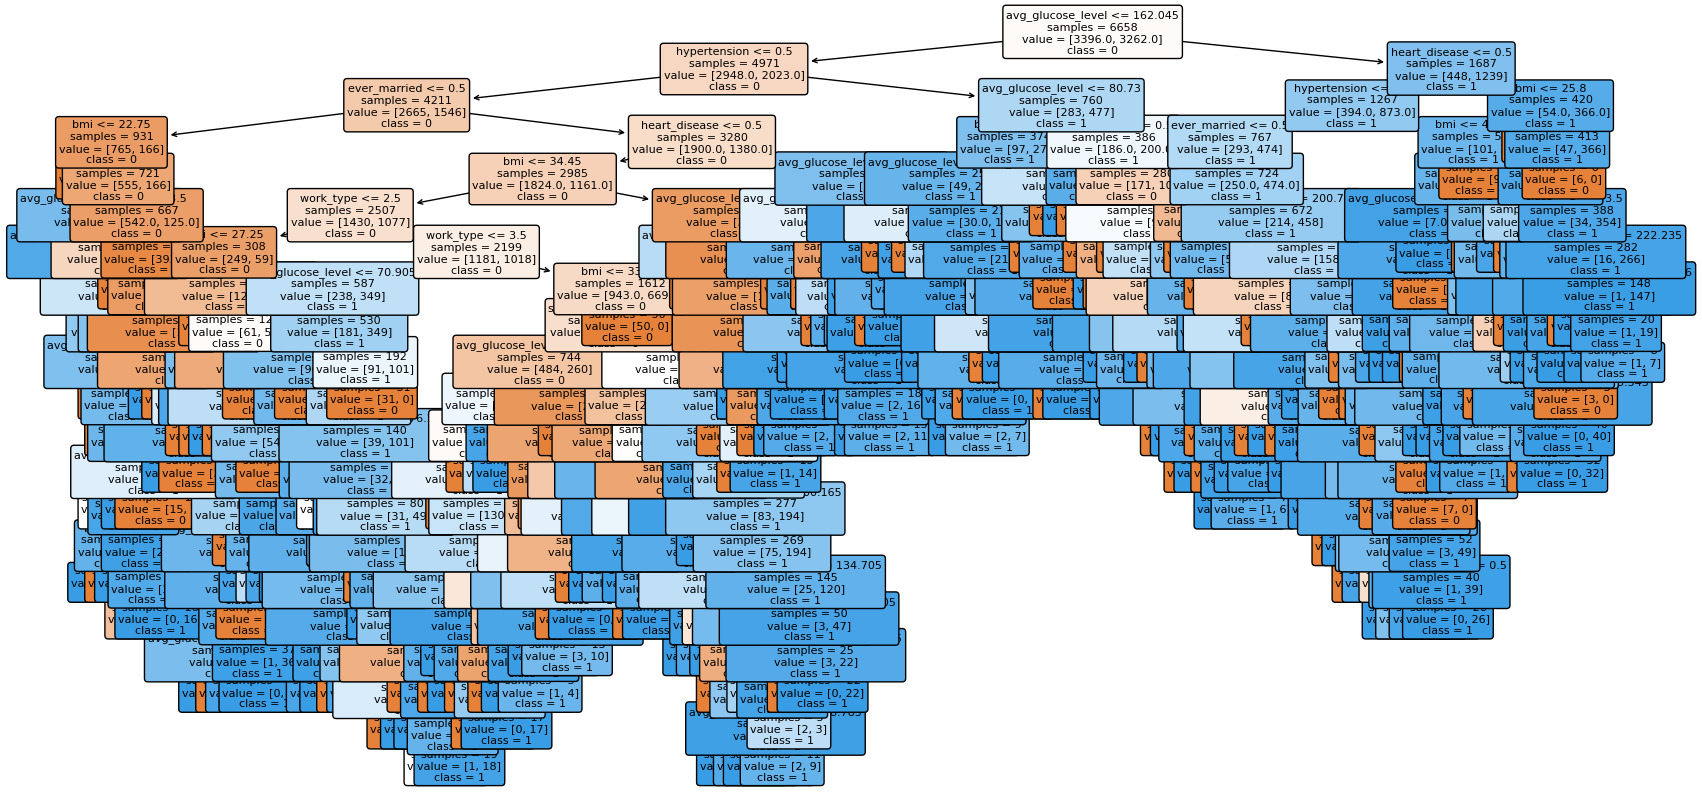

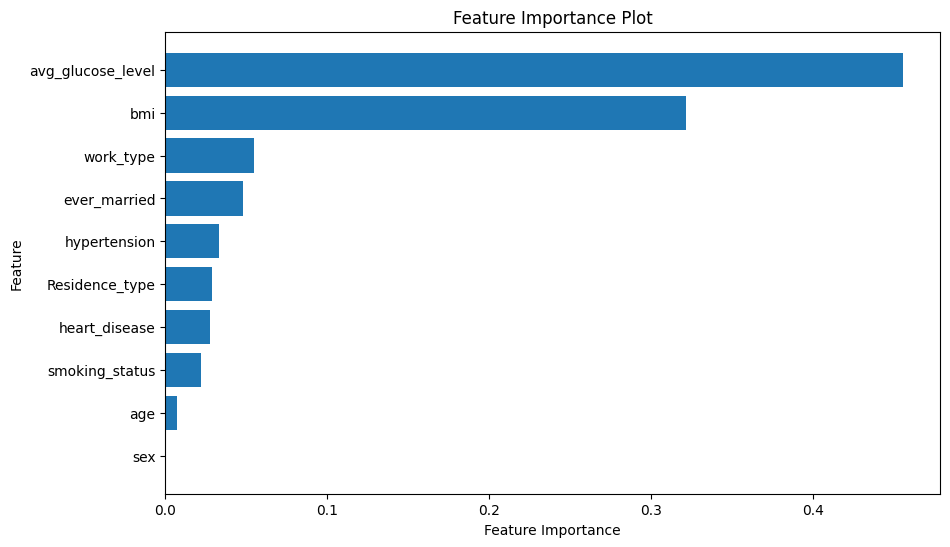

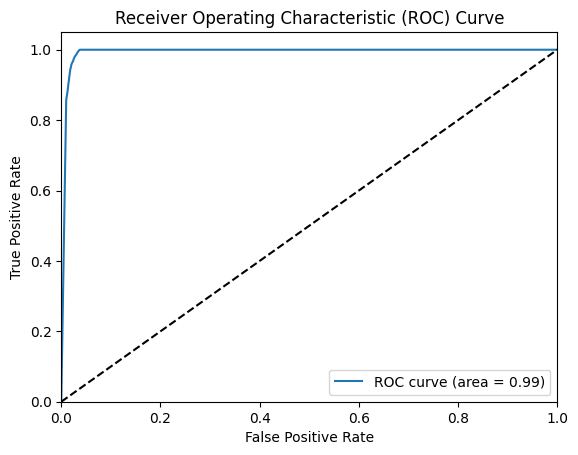

AUC Score: 0.9930793493558454


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.948948948948949, 0.9519519519519519, 0.96996996996997, 0.9504504504504504, 0.9519519519519519, 0.954954954954955, 0.9579579579579579, 0.9534534534534534, 0.9368421052631579, 0.9593984962406015]
Mean accuracy: 0.95358802411434
95% confidence interval: (0.9475543924464022, 0.9596216557822778)


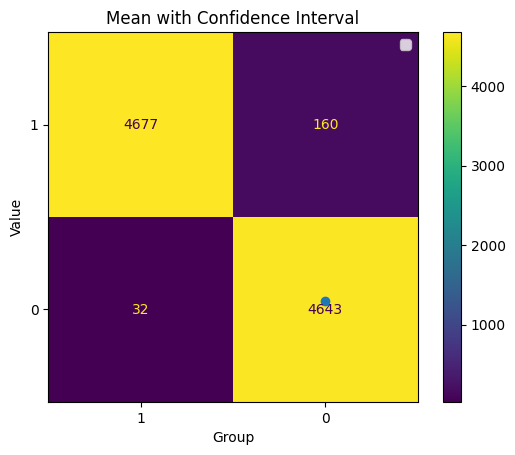


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 31.581401586532593
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.3, 'max_depth': 4, 'max_iter': 300, 'min_samples_leaf': 2}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1441
           1       0.98      0.99      0.99      1413

    accuracy                           0.99      2854
   macro avg       0

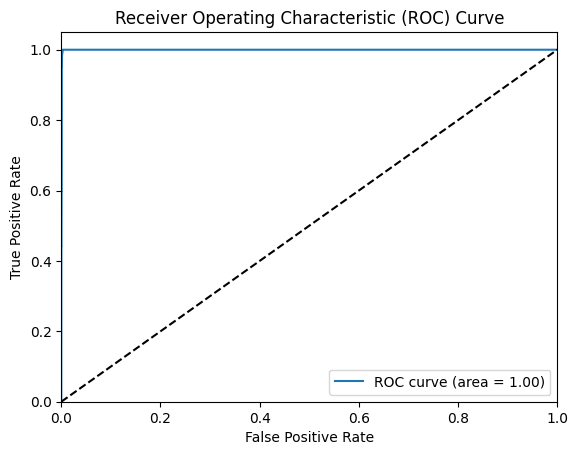

AUC Score: 0.9994837919380356


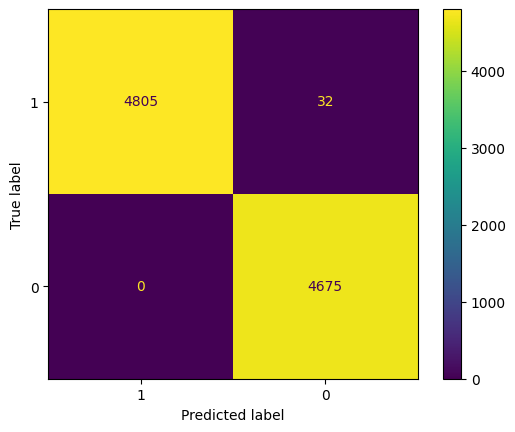

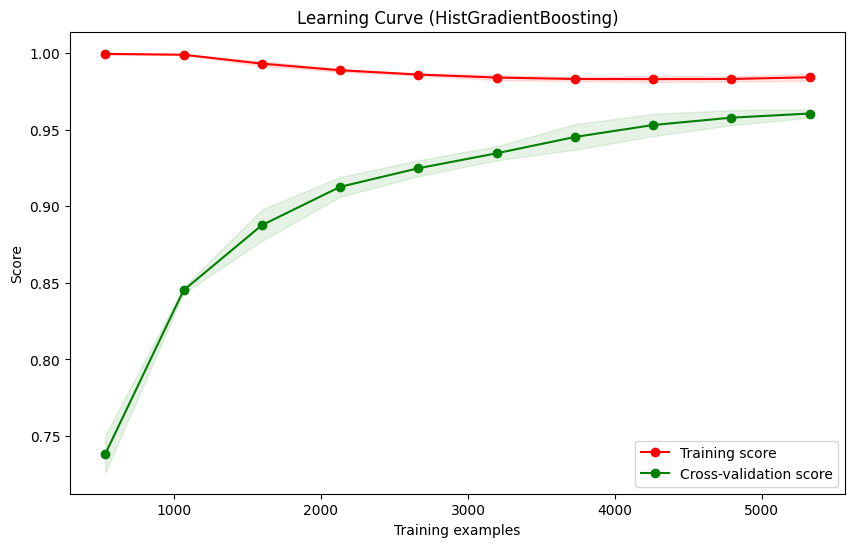

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9819819819819819, 0.9819819819819819, 0.993993993993994, 0.9894894894894894, 0.984984984984985, 0.9834834834834835, 0.9819819819819819, 0.9924924924924925, 0.9894736842105263, 0.9849624060150376]
Mean accuracy: 0.9864826480615955
95% confidence interval: (0.983240722220849, 0.9897245739023419)


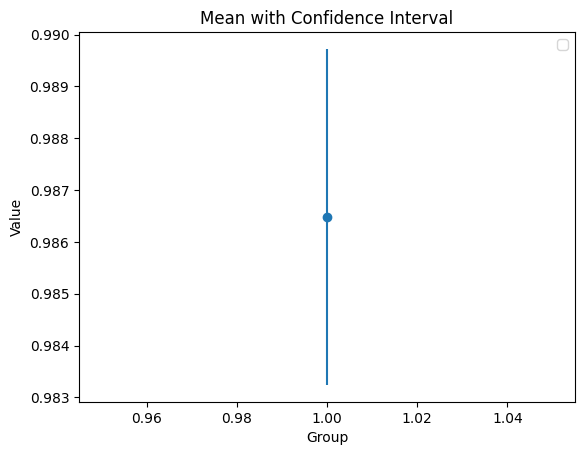


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 951
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 951
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values: 951
Percentage of abnormal values: 10.00%

TOTAL INCONSISTENCY PERCENTAGE
29.993692178301096

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    

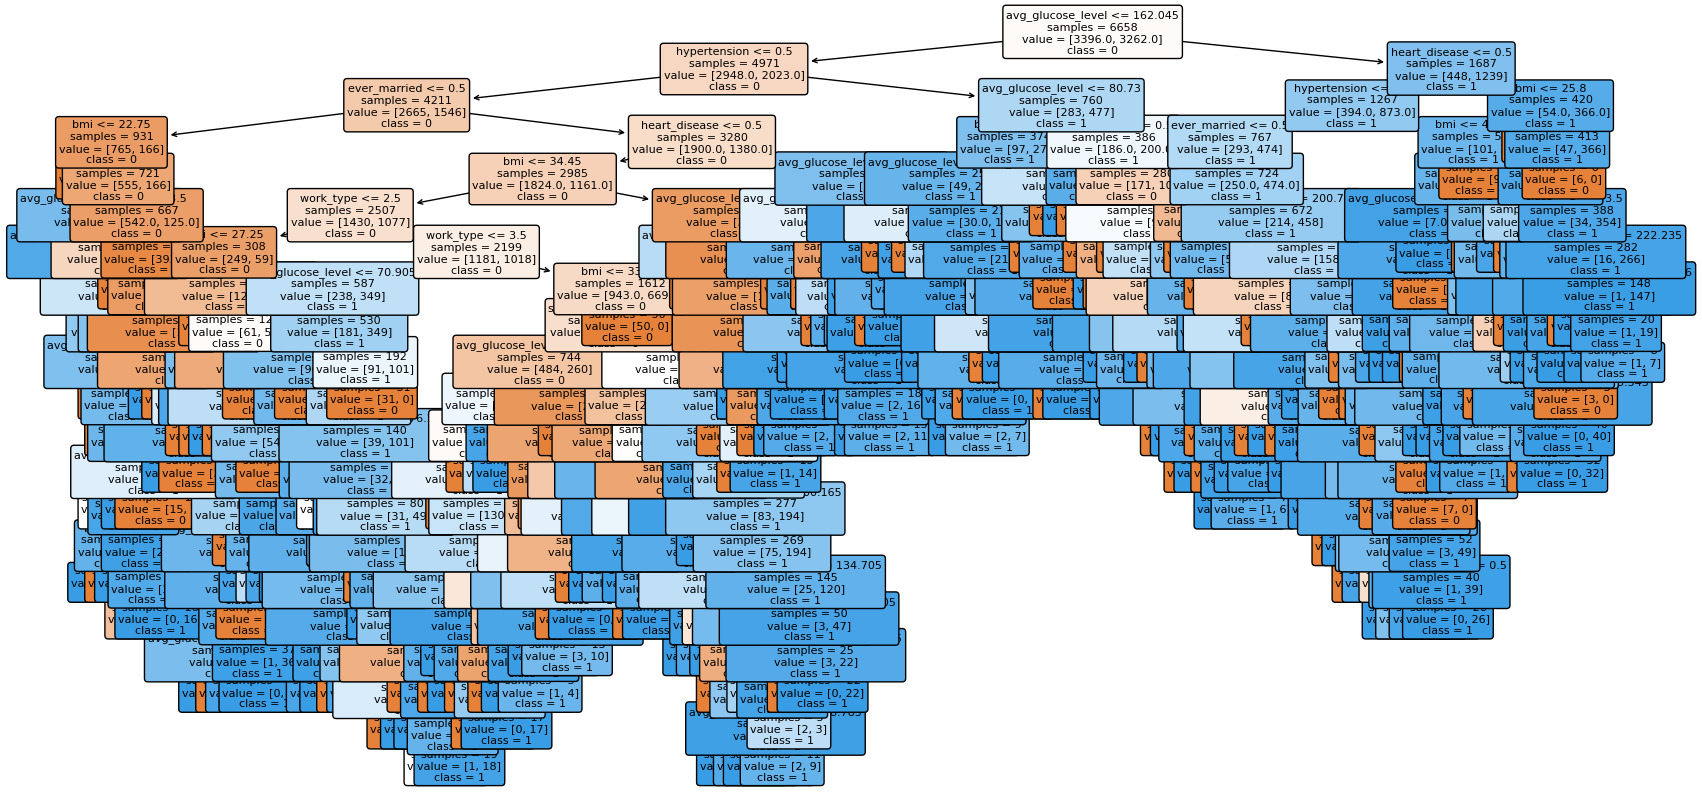

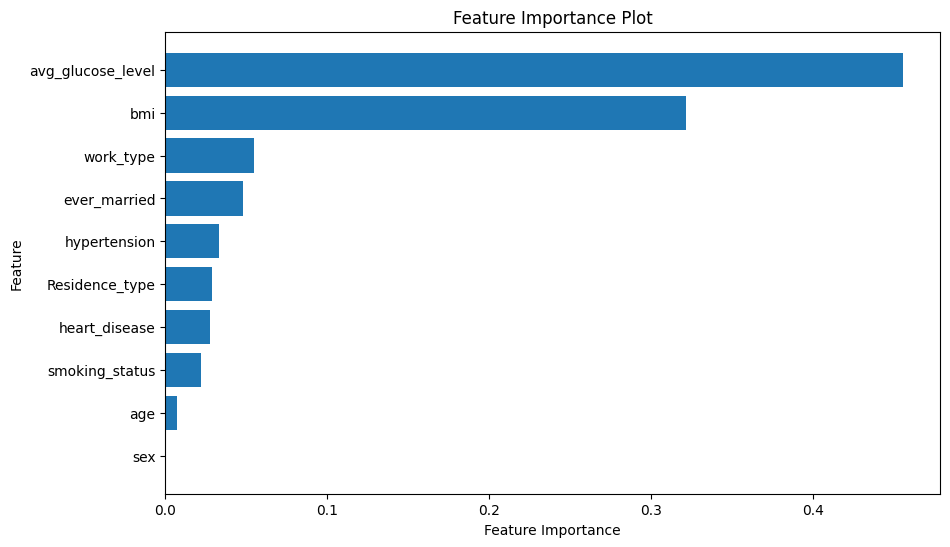

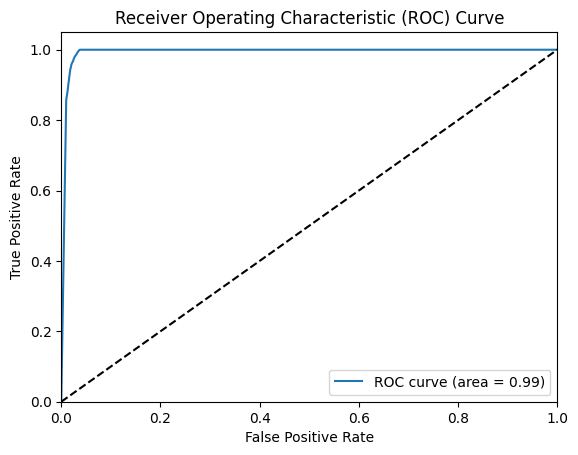

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9930793493558454
Accuracy for each fold: [0.948948948948949, 0.954954954954955, 0.960960960960961, 0.9414414414414415, 0.9519519519519519, 0.9624624624624625, 0.9354354354354354, 0.9669669669669669, 0.9428571428571428, 0.9518796992481203]
Mean accuracy: 0.9517859965228388
95% confidence interval: (0.9446291244116463, 0.9589428686340313)


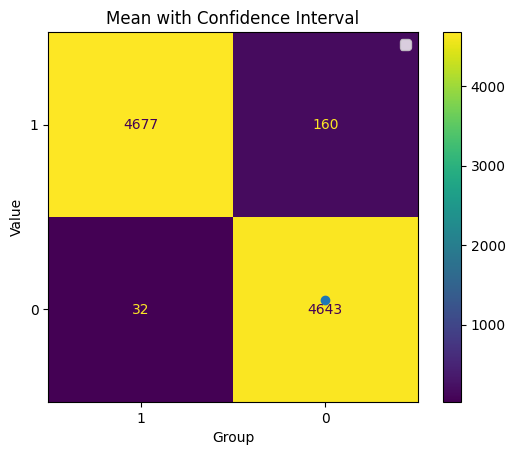


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 33.57999324798584
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 427, 'min_samples_leaf': 16}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1441
           1       0.98      0.97      0.97      1413

    accuracy                           0.98      2854
   macro avg       0

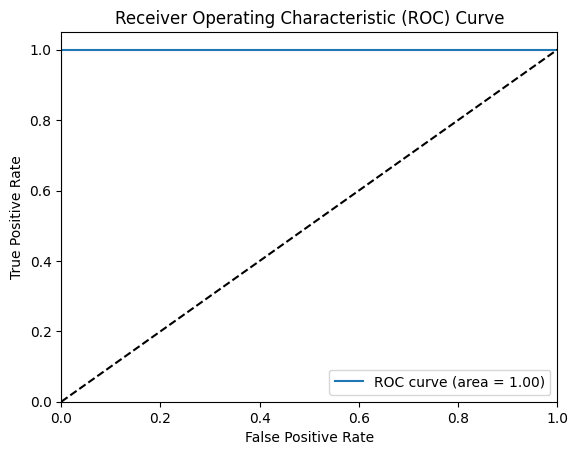

AUC Score: 0.9998899746716209


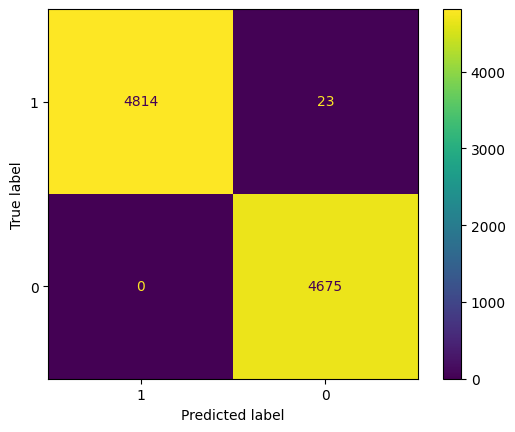

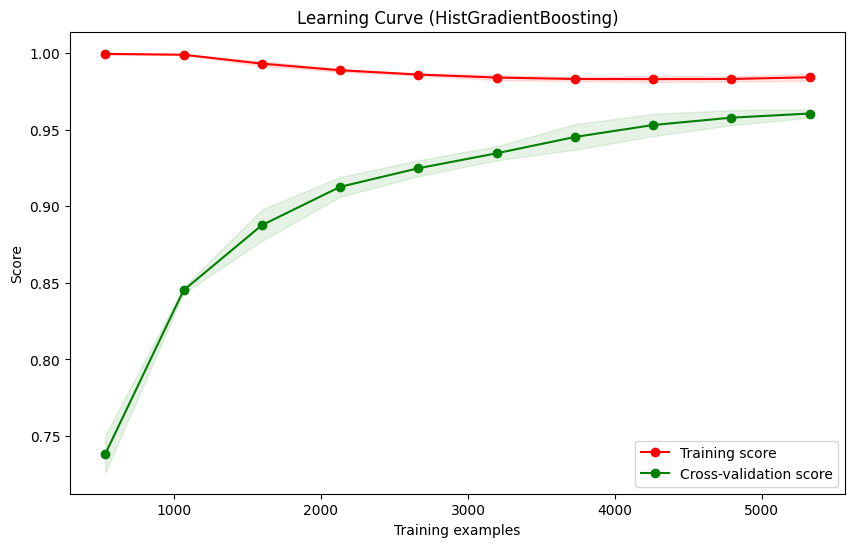

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9894894894894894, 0.996996996996997, 0.9894894894894894, 0.990990990990991, 0.9924924924924925, 0.9819819819819819, 0.993993993993994, 0.993993993993994, 0.98796992481203, 0.9894736842105263]
Mean accuracy: 0.9906873038451985
95% confidence interval: (0.9877422419515367, 0.9936323657388604)


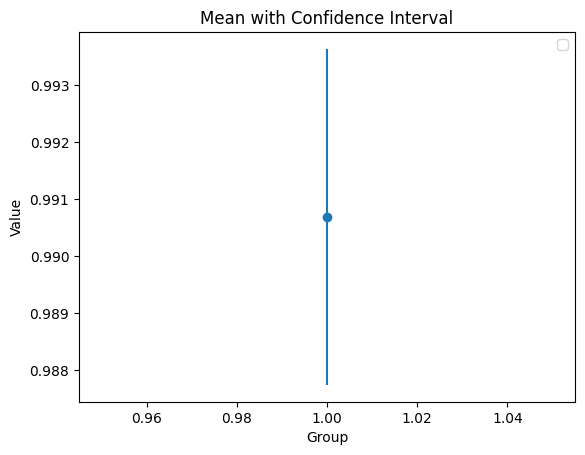


ORIGINAL VALUES RESTORED


In [5]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 1585
Percentage of inconsistencies in age and married features: 16.66%
Number of inconsistencies in age and workType features: 1585
Percentage of inconsistencies in age and workType features: 16.66%
Number of abnormal values: 1585
Percentage of abnormal values: 16.66%

TOTAL INCONSISTENCY PERCENTAGE
49.989486963835155

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision 

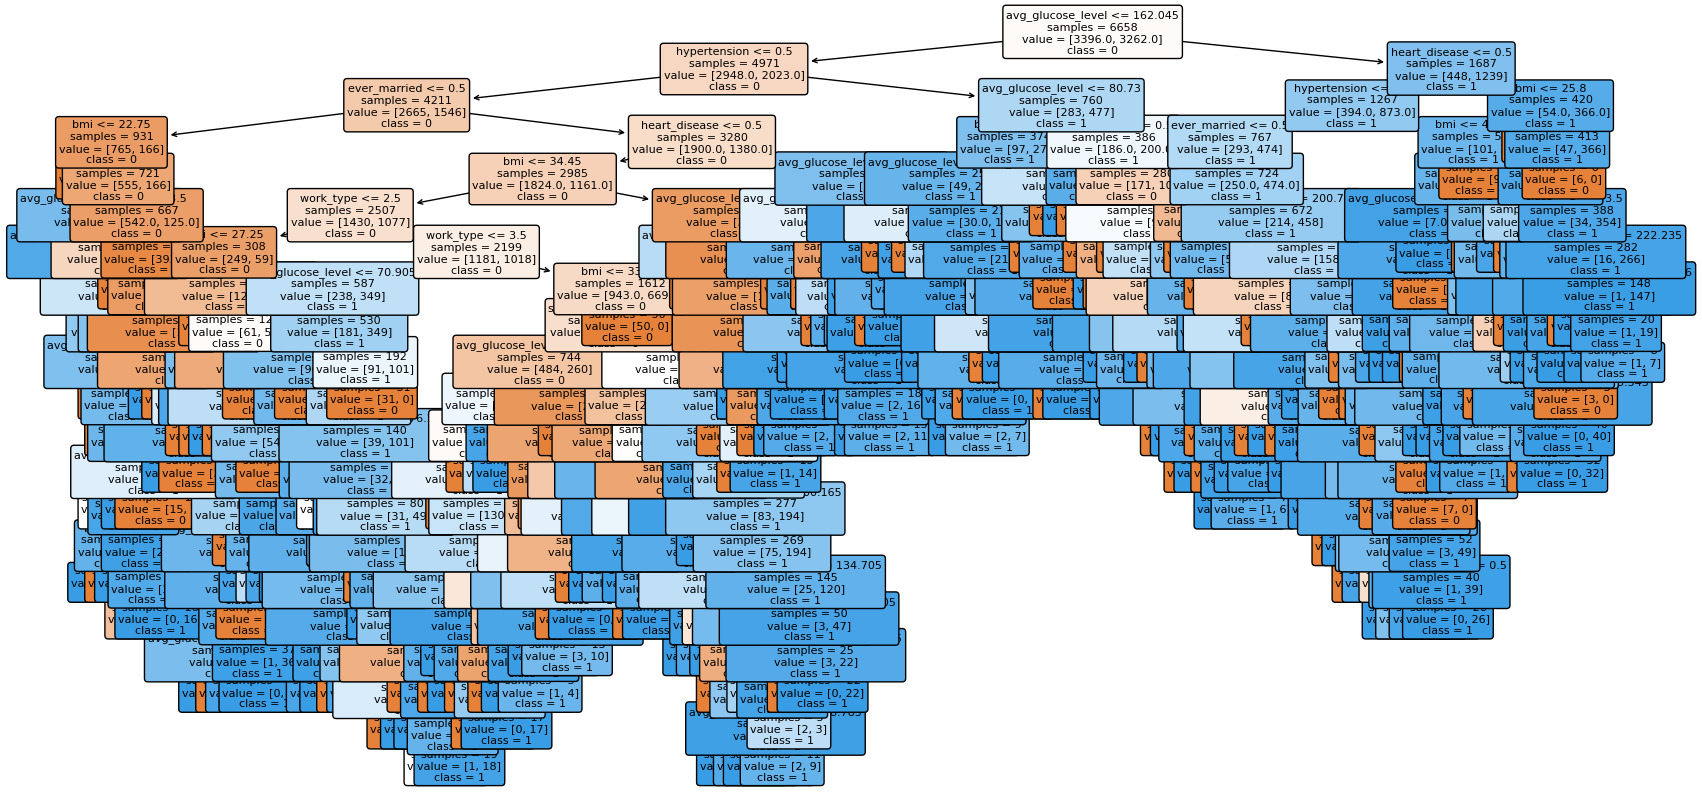

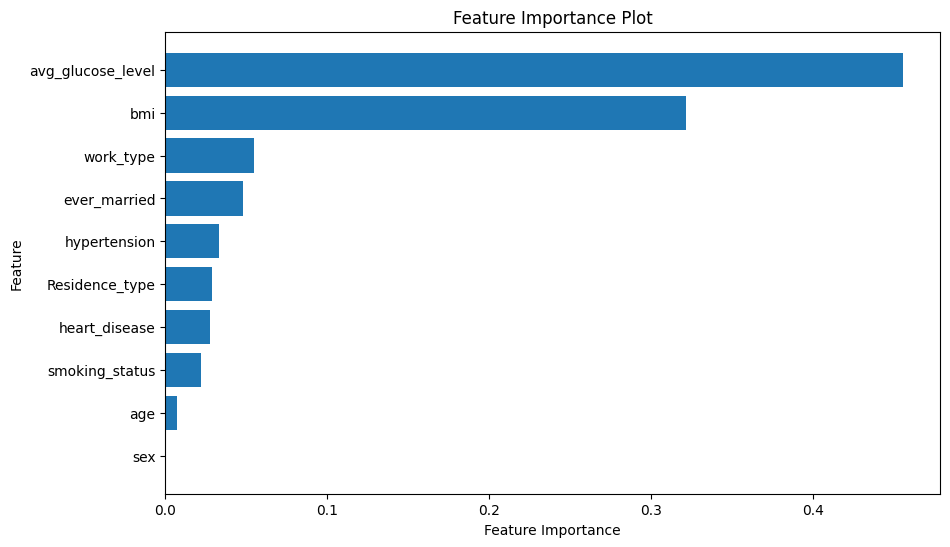

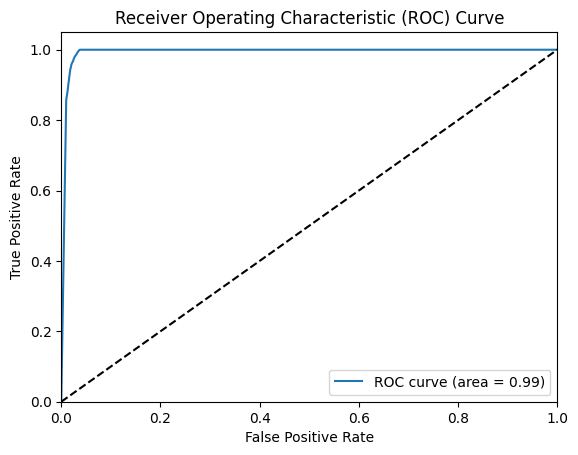

AUC Score: 0.9930793493558454
Accuracy for each fold: [0.9579579579579579, 0.963963963963964, 0.9279279279279279, 0.9504504504504504, 0.948948948948949, 0.9669669669669669, 0.9294294294294294, 0.9579579579579579, 0.9548872180451128, 0.9443609022556391]
Mean accuracy: 0.9502851723904355
95% confidence interval: (0.9408187905141205, 0.9597515542667505)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


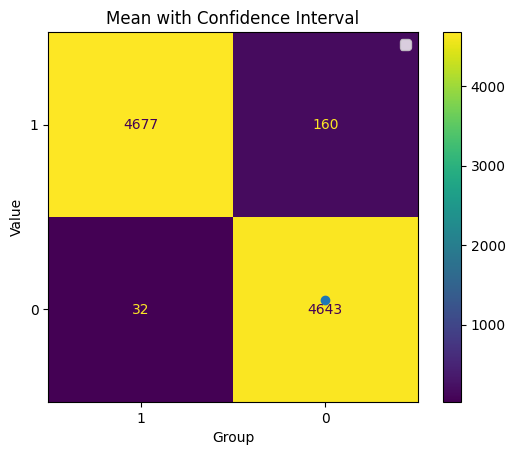


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 41.700803995132446
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 432, 'min_samples_leaf': 14}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1441
           1       0.98      0.94      0.96      1413

    accuracy                           0.96      2854
   macro avg       

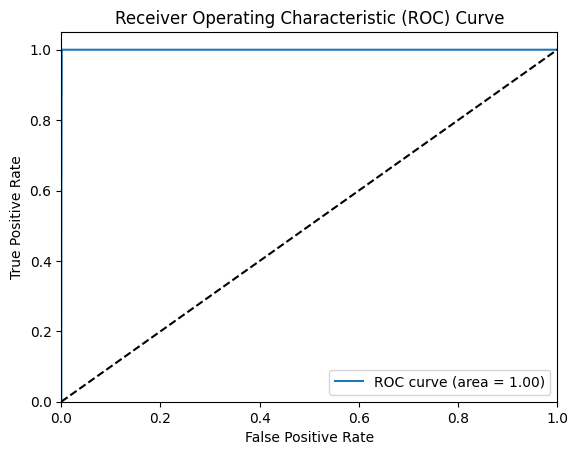

AUC Score: 0.9997710606410698


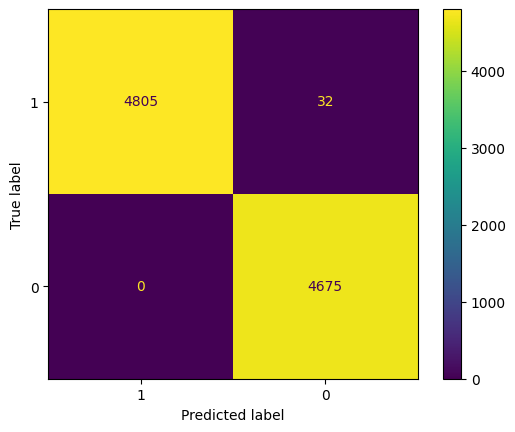

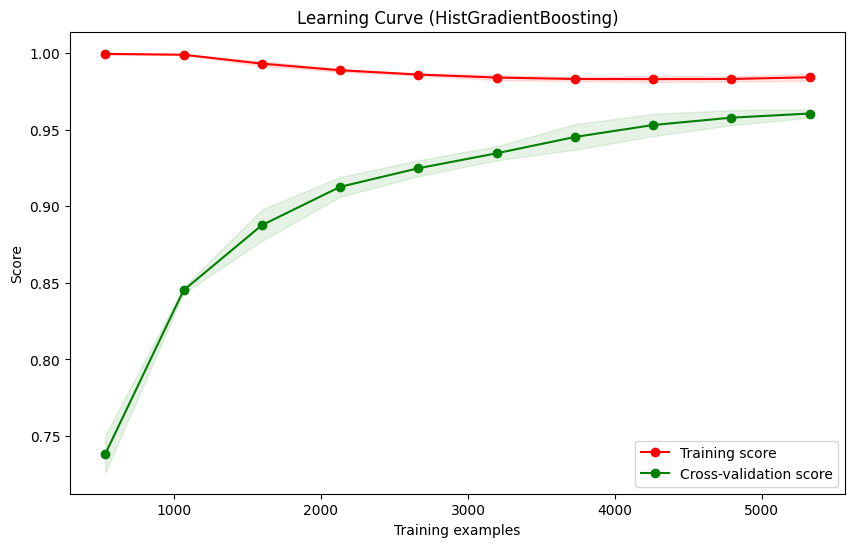

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9894894894894894, 0.9894894894894894, 0.9864864864864865, 0.9834834834834835, 0.996996996996997, 0.993993993993994, 0.9894894894894894, 0.9864864864864865, 0.9864661654135338, 0.9789473684210527]
Mean accuracy: 0.9881329449750502
95% confidence interval: (0.984495972260974, 0.9917699176891265)


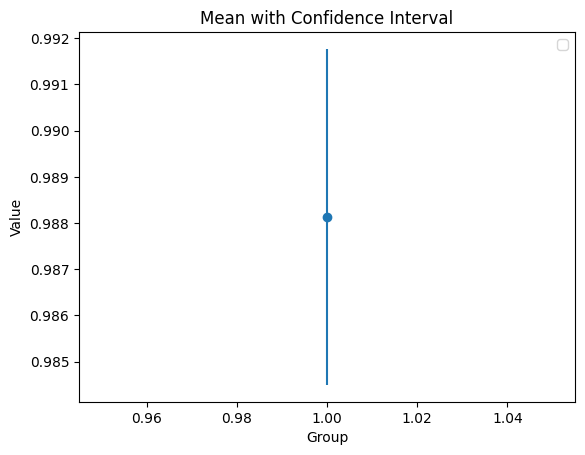


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 3170
Percentage of inconsistencies in age and married features: 33.33%
Number of inconsistencies in age and workType features: 3170
Percentage of inconsistencies in age and workType features: 33.33%
Number of abnormal values: 3170
Percentage of abnormal values: 33.33%

TOTAL INCONSISTENCY PERCENTAGE
99.97897392767031

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision  

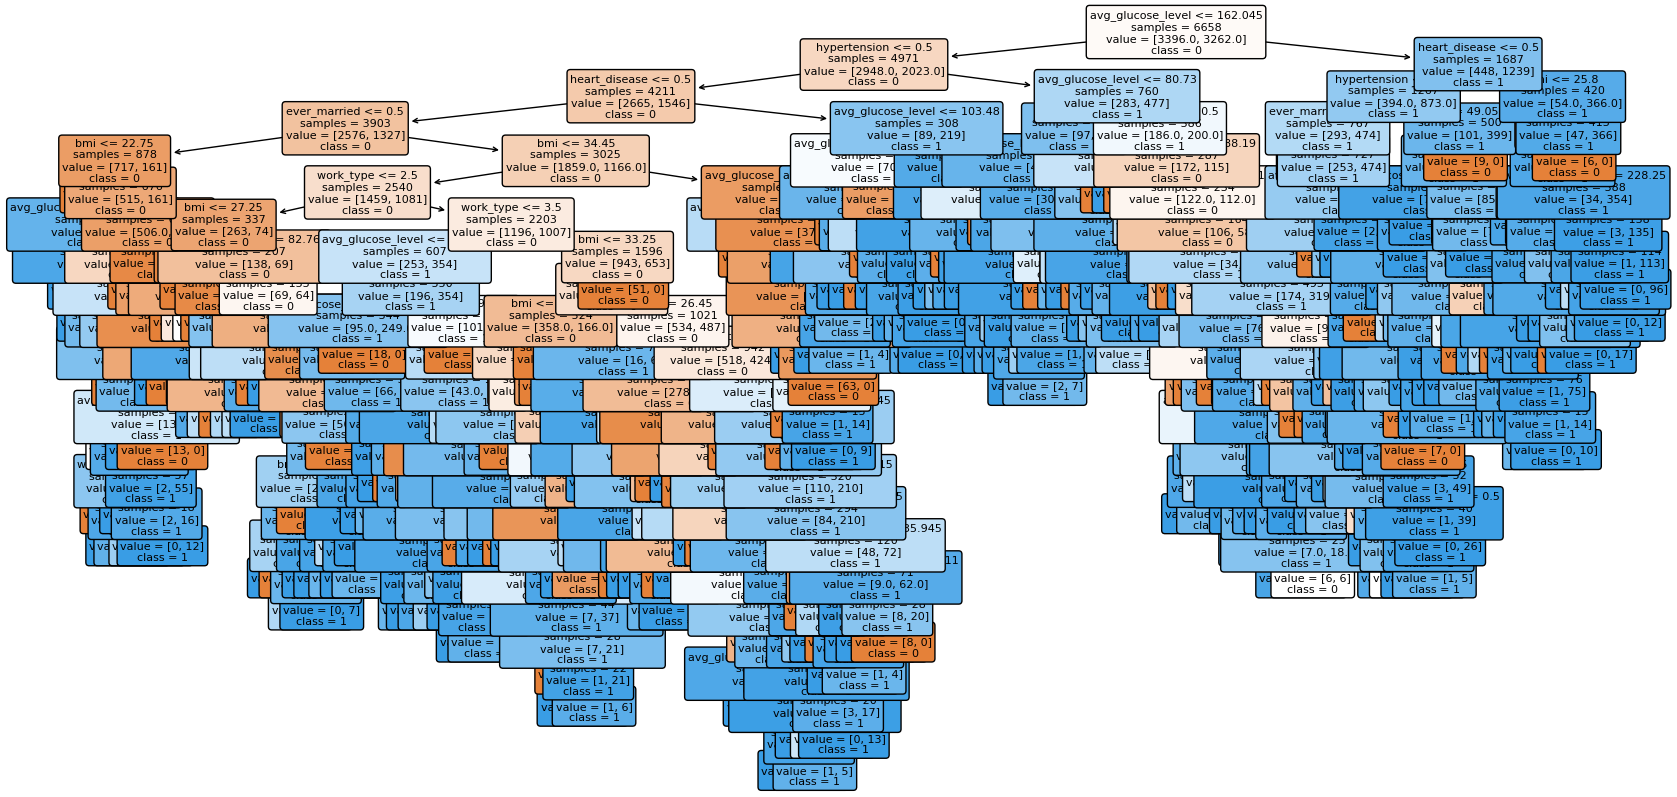

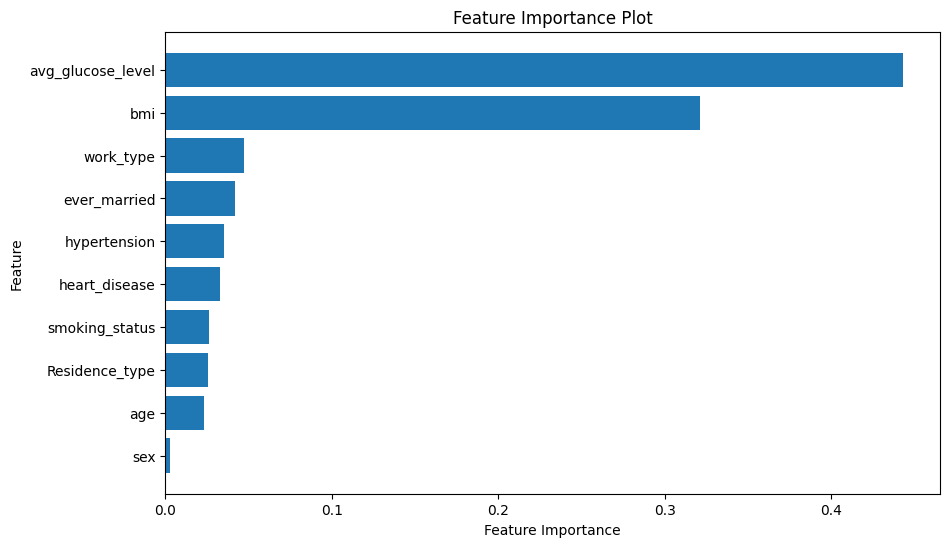

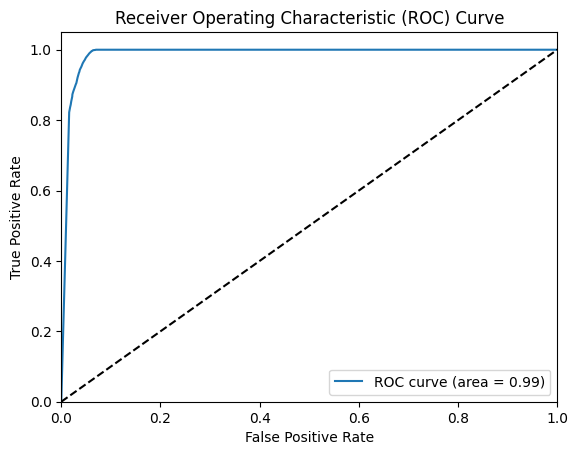

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9875861093022921
Accuracy for each fold: [0.9519519519519519, 0.9564564564564565, 0.9204204204204204, 0.9384384384384384, 0.9474474474474475, 0.9414414414414415, 0.9384384384384384, 0.9324324324324325, 0.9503759398496241, 0.9473684210526315]
Mean accuracy: 0.9424771387929283
95% confidence interval: (0.9348716582443236, 0.9500826193415329)


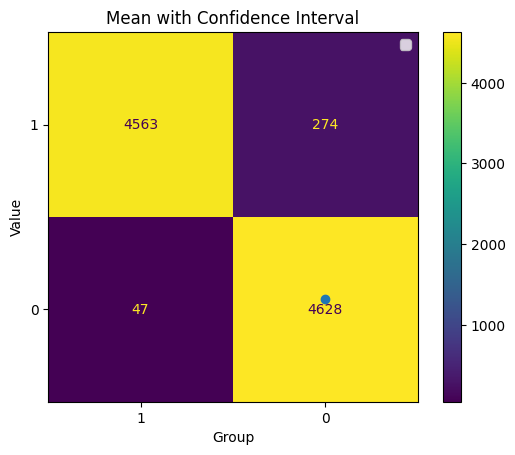


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 50.295740604400635
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 8, 'max_iter': 484, 'min_samples_leaf': 4}
Best score on training data:  0.9960122699386502
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1441
           1       0.97      0.98      0.97      1413

    accuracy                           0.97      2854
   ma

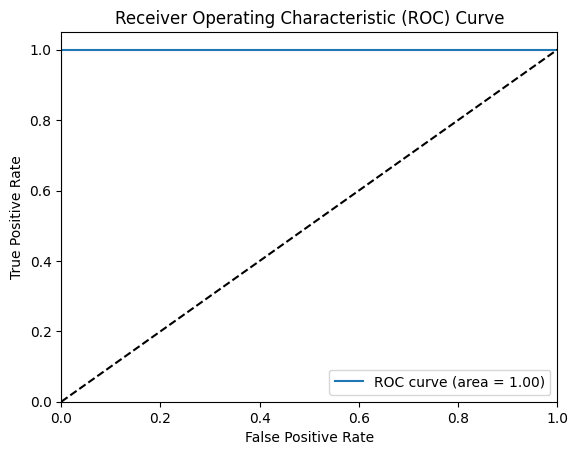

AUC Score: 0.9999968602096805


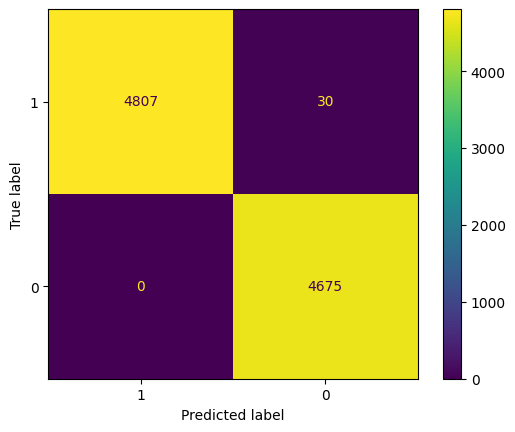

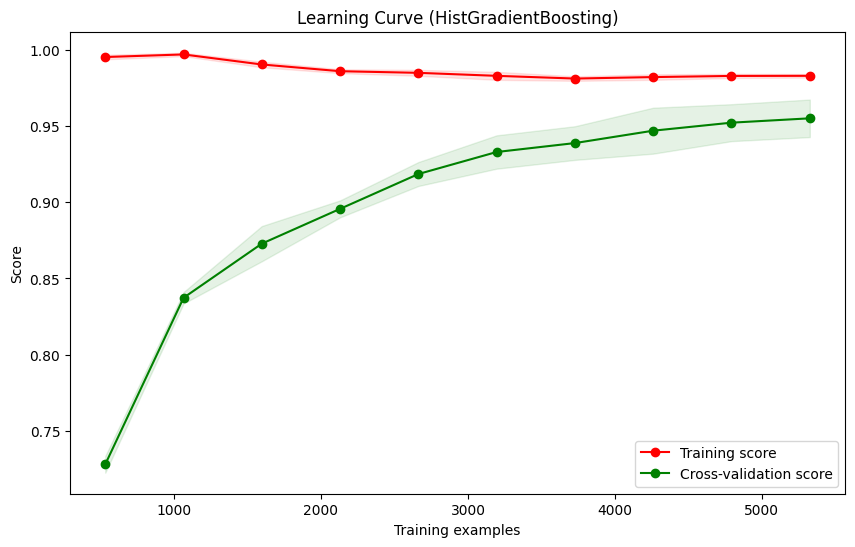

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9864864864864865, 0.9894894894894894, 0.9894894894894894, 0.9924924924924925, 0.9864864864864865, 0.993993993993994, 0.9924924924924925, 0.984984984984985, 0.9939849624060151, 0.9864661654135338]
Mean accuracy: 0.9896367043735464
95% confidence interval: (0.9871841639329588, 0.9920892448141341)


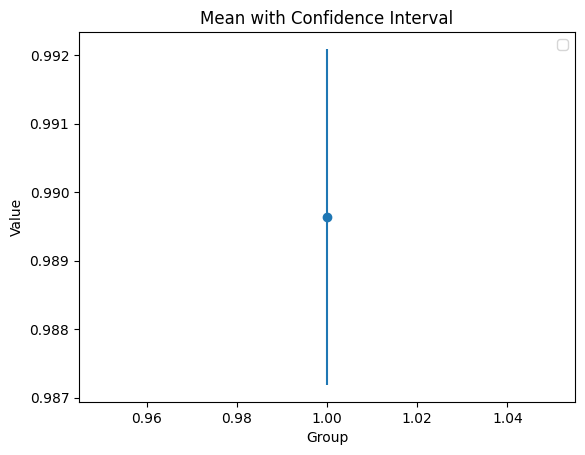


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3396
           1       0.96      0.99      0.98      3262

    accuracy                           0.98      6658
   macro avg       0.98      0.98      0.98      6658
weighted avg       0.98      0.98      0.98      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1441
           1       0.94      1.00      0.96      1413

    accuracy                           0.96      2854
   macro avg       0.97      0.96      0.96      2854
weighted avg       0.97      0.96      0.96      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4837
           1     

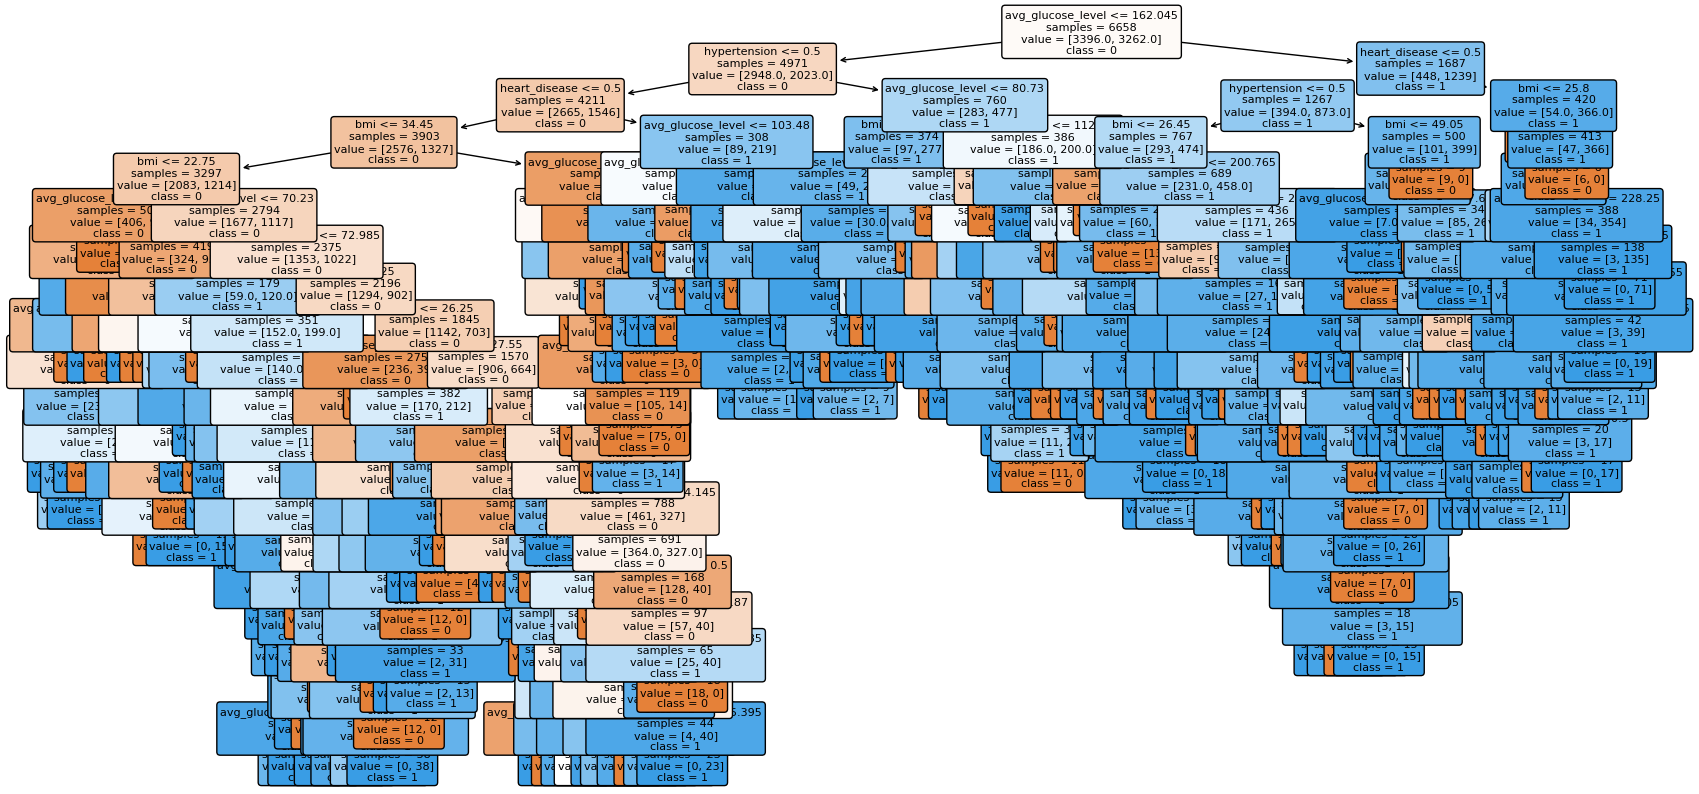

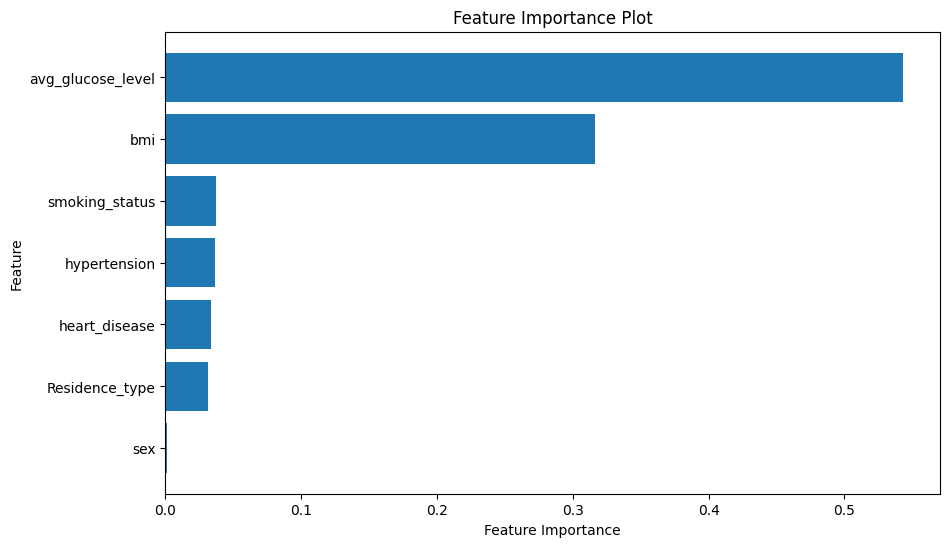

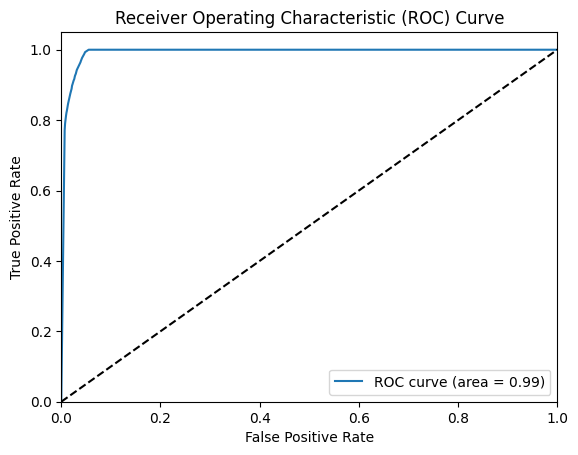

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.992185880009154
Accuracy for each fold: [0.9669669669669669, 0.963963963963964, 0.9594594594594594, 0.9579579579579579, 0.9519519519519519, 0.9654654654654654, 0.9594594594594594, 0.924924924924925, 0.9518796992481203, 0.9609022556390977]
Mean accuracy: 0.956293210503737
95% confidence interval: (0.947619117767412, 0.9649673032400619)


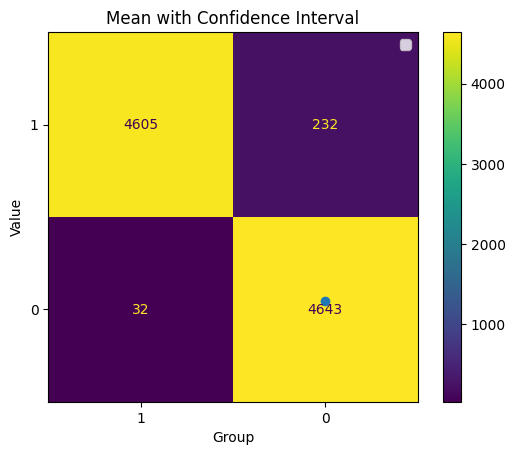


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 26.175095319747925
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 283, 'min_samples_leaf': 12}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1441
           1       0.98      1.00      0.99      1413

    accuracy                           0.99      2854
   macro avg       

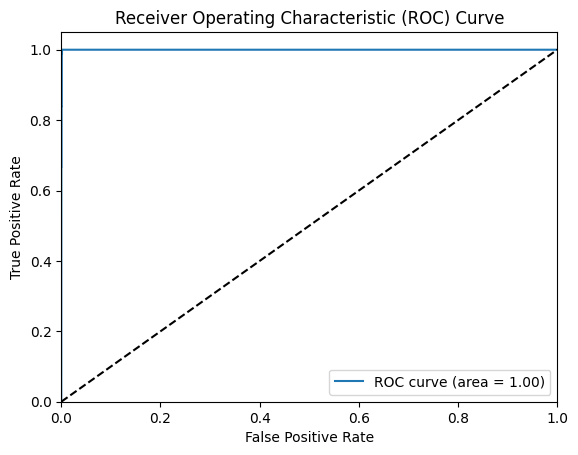

AUC Score: 0.9996562814048129


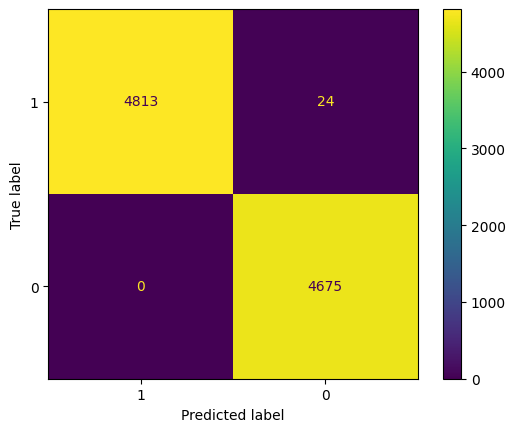

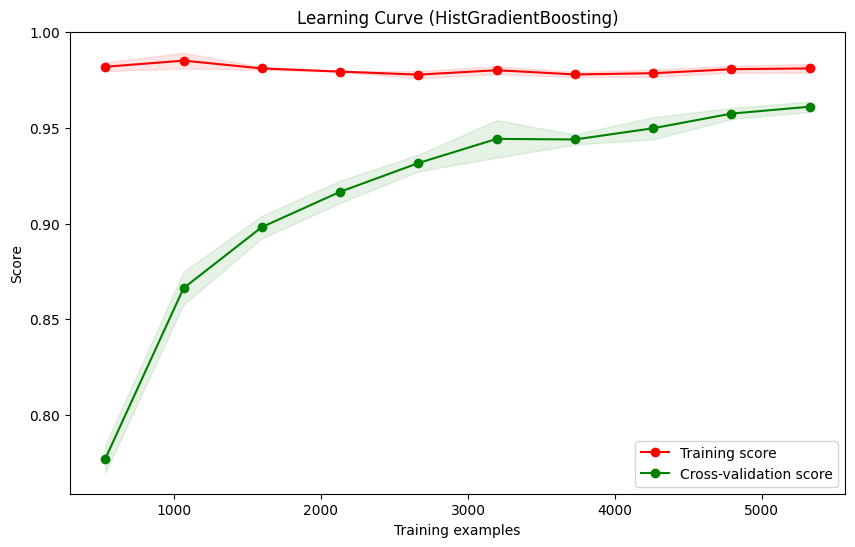

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.990990990990991, 0.987987987987988, 0.990990990990991, 0.9894894894894894, 0.987987987987988, 0.990990990990991, 0.9864864864864865, 0.9774774774774775, 0.98796992481203, 0.9894736842105263]
Mean accuracy: 0.9879846011424958
95% confidence interval: (0.9851207757858267, 0.9908484264991648)


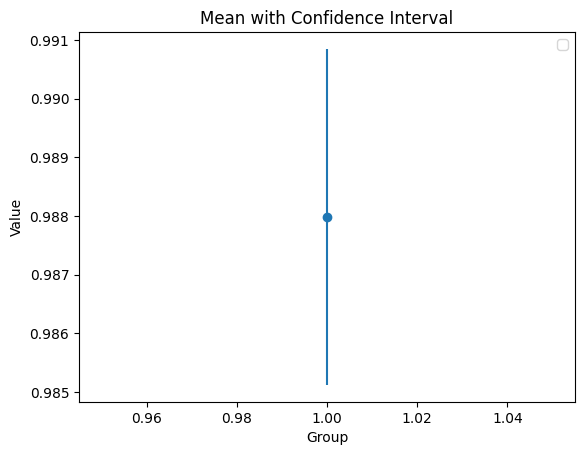

In [4]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df_train, df_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_train)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_train, df_test)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_train) 
